In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(key, value) for (key, value) in word_index.items()])
decoded_review = " ".join(reverse_word_index.get(i - 3, "?") for i in train_data[0])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.

  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
idx_slice = 10000
x_val = x_train[:idx_slice]
partitial_x_train = x_train[idx_slice:]
y_val = y_train[:idx_slice]
partitial_y_train = y_train[idx_slice:]

In [18]:
history = model.fit(partitial_x_train,
                    partitial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6547 - loss: 0.6314 - val_accuracy: 0.7947 - val_loss: 0.4728
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8780 - loss: 0.3936 - val_accuracy: 0.8595 - val_loss: 0.3543
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9126 - loss: 0.2755 - val_accuracy: 0.8880 - val_loss: 0.2935
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9321 - loss: 0.2214 - val_accuracy: 0.8884 - val_loss: 0.2798
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9421 - loss: 0.1824 - val_accuracy: 0.8889 - val_loss: 0.2776
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9531 - loss: 0.1509 - val_accuracy: 0.8880 - val_loss: 0.2822
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9605 - loss: 0.1296 - val_accuracy: 0.8831 - val_loss: 0.3047
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9679 - loss: 0.1132 - val_accuracy: 0.8760 - v

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

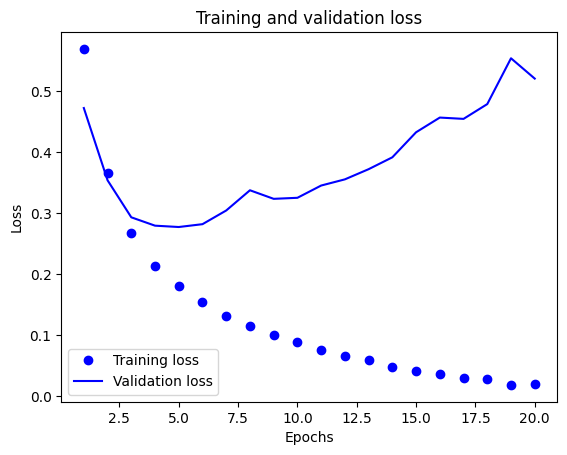

In [20]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values =history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

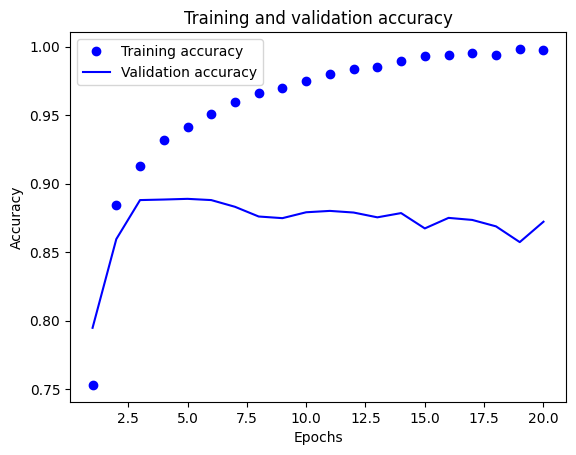

In [22]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model = Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7369 - loss: 0.5465
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9012 - loss: 0.2810
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9272 - loss: 0.2103
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9418 - loss: 0.1774
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8844 - loss: 0.2880


In [24]:
results # loss, acc

[0.28803566098213196, 0.8848000168800354]

In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.18766458],
       [0.99917686],
       [0.75749445],
       ...,
       [0.08918476],
       [0.05535801],
       [0.52851844]], dtype=float32)

In [26]:
y_test[:3]

array([0., 1., 1.], dtype=float32)

In [27]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=idx_slice)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
len(train_data), len(test_data)

(8982, 2246)

In [30]:
train_data[10][:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

In [31]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(key, value) for (key, value) in word_index.items()])
decoded_newswire = " ".join(reverse_word_index.get(i - 3, "?") for i in train_data[0])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))

  for i, label in enumerate(labels):
    results[i, label] = 1.

  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [34]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [51]:
model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [52]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
idx_slice = 1000
x_val = x_train[:idx_slice]
partitial_x_train = x_train[idx_slice:]
y_val = y_train[:idx_slice]
partitial_y_train = y_train[idx_slice:]

In [54]:
history = model.fit(partitial_x_train,
                    partitial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3662 - loss: 3.3955 - val_accuracy: 0.6110 - val_loss: 2.0814
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6502 - loss: 1.8294 - val_accuracy: 0.6810 - val_loss: 1.4536
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7204 - loss: 1.2729 - val_accuracy: 0.7240 - val_loss: 1.2442
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.7634 - loss: 1.0539 - val_accuracy: 0.7480 - val_loss: 1.1141
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8167 - loss: 0.8563 - val_accuracy: 0.7810 - val_loss: 1.0495
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8552 - loss: 0.6939 - val_accuracy: 0.8010 - val_loss: 0.9818
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8820 - loss: 0.5844 - val_accuracy: 0.7960 - val_loss: 0.9543
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8977 - loss: 0.4956 - val_accuracy: 0.7840 - v

In [55]:
history_dict = history.history

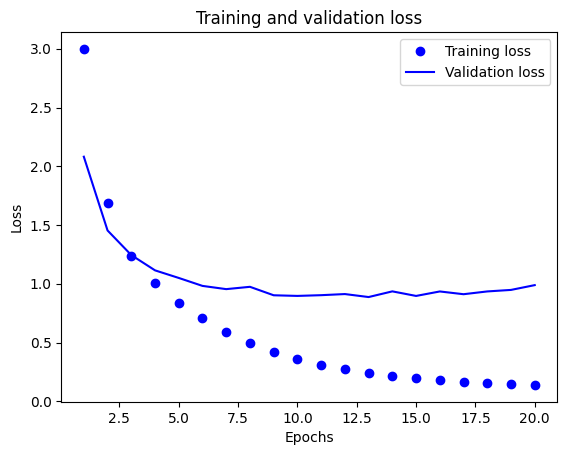

In [56]:
loss_values = history_dict['loss']
val_loss_values =history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

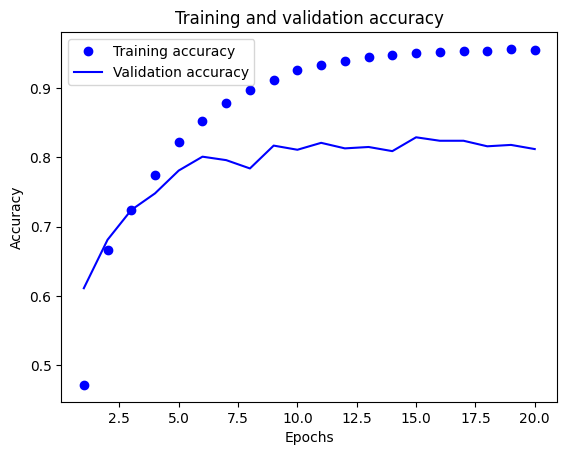

In [57]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.3848 - loss: 2.9446
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6797 - loss: 1.4853
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7608 - loss: 1.1295
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8126 - loss: 0.8912
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8440 - loss: 0.7277
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8674 - loss: 0.6102
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8914 - loss: 0.4970
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9161 - loss: 0.4085
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9243 - loss: 0.3508
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8024 - loss: 0.8887


In [59]:
results # loss, acc

[0.918920636177063, 0.7925200462341309]

In [60]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18788958147818344

In [61]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [62]:
predictions[0].shape

(46,)

In [64]:
np.sum(predictions[0])

0.99999994

In [65]:
np.argmax(predictions[0])

3

In [66]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [68]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partitial_x_train,
                    partitial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1337 - loss: 3.5227 - val_accuracy: 0.2810 - val_loss: 2.7725
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3153 - loss: 2.5259 - val_accuracy: 0.3870 - val_loss: 2.0911
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6342 - loss: 1.7342 - val_accuracy: 0.6920 - val_loss: 1.4628
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7176 - loss: 1.2107 - val_accuracy: 0.6940 - val_loss: 1.3348
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7288 - loss: 1.0670 - val_accuracy: 0.6990 - val_loss: 1.2990
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7489 - loss: 0.9618 - val_accuracy: 0.6980 - val_loss: 1.2901
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7597 - loss: 0.8877 - val_accuracy: 0.7040 - val_loss: 1.2784
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7633 - loss: 0.8586 - val_accuracy: 0.7040 - v

In [70]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [74]:
train_data.shape, test_data.shape, train_targets.shape

((404, 13), (102, 13), (404,))

In [75]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [76]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [87]:
def build_model():
  model = Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

  return model

# K-fold

Verbose=0 (silent)

Verbose=1 (progress bar)

Verbose=2 (one line per epoch)

In [78]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis=0
  )
  model = build_model()
  model.fit(partial_train_data,
            partial_train_targets,
            epochs=num_epochs,
            batch_size=16,
            verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [79]:
all_scores

[1.9847383499145508, 2.4717559814453125, 2.415408134460449, 2.365142345428467]

In [80]:
np.mean(all_scores)

2.309261202812195

In [89]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis=0
  )
  model = build_model()
  history = model.fit(partial_train_data,
            partial_train_targets,
            validation_data=(val_data, val_targets),
            epochs=num_epochs,
            batch_size=16,
            verbose=0)

  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [94]:
all_mae_histories_np = np.asarray(all_mae_histories)
all_mae_histories_np.shape

(4, 500)

In [106]:
average_mae_history = np.array([all_mae_histories_np.mean(axis=0)]).reshape(500)
average_mae_history.shape

(500,)

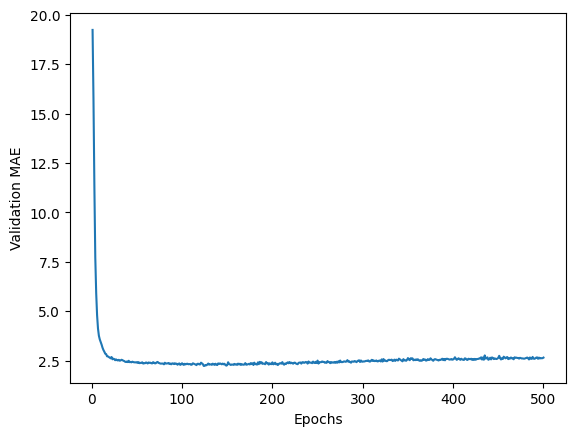

In [109]:
plt.plot(range(1, average_mae_history.shape[0] + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

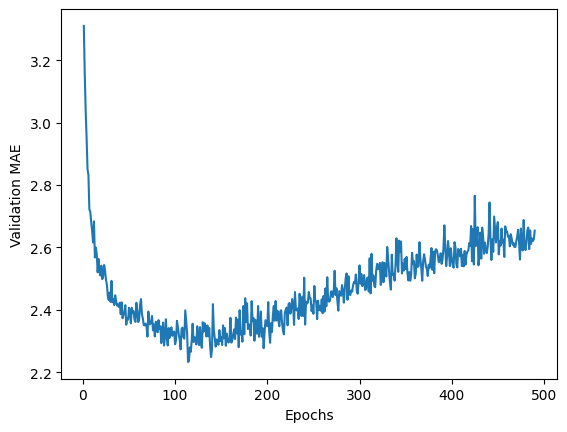

In [110]:
trunced_mae_history = average_mae_history[10:]
plt.plot(range(1, len(trunced_mae_history) + 1), trunced_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [111]:
model = build_model()

model.fit(train_data,
          train_targets,
          epochs=130,
          batch_size=16,
          verbose=0)

test_mse, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.2299 - mae: 2.3169 


In [112]:
test_mae_score

2.494319200515747

In [114]:
predictions = model.predict(test_data)
predictions[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[ 8.109896],
       [18.034948],
       [21.514791],
       [33.93026 ],
       [24.330898]], dtype=float32)

In [115]:
test_targets[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])